# import all the useful libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
from matplotlib import rcParams
rcParams['axes.unicode_minus']=False


# Read the csv file into the dataframe and create train_test_split

In [164]:
df = pd.read_csv("C:/Users/melvi/Desktop/Capstone/final_2_300_1_1.csv",encoding = "gbk")
df_price = df["Unit Price"]

del df["Unit Price"]
Y= df_price
X= df
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state = 1)


# Import all the regressor

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor


# Fit the model using training set then obtain the score using testing set

In [166]:
models=[RandomForestRegressor(),LinearRegression(),KNeighborsRegressor(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),XGBRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['RandomForest','LinearRegression','KNNRegressor','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','AdaBoost','GradientBoost','Bagging']
score_=[]

In [167]:
for name,model in zip(models_str,models):
    model=model
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)  
    score=model.score(x_test,y_test)
    score_.append(str(score)[:5])
    print(name +' Score:'+str(score))

RandomForest Score:0.93801482951
LinearRegression Score:0.770414901791
KNNRegressor Score:0.780702909711
Ridge Score:0.770395504881
Lasso Score:0.770117813651
MLPRegressor Score:0.700633091273
DecisionTree Score:0.900873525385
ExtraTree Score:0.868894881341
[09:22:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Score:0.769245511807
AdaBoost Score:0.21727458386
GradientBoost Score:0.770669574335
Bagging Score:0.943278252129


# tuning the n_estimator of the randomforest regressor and plot the reult

In [134]:
i = 10
score_list = []
while i < 200:
    model = RandomForestRegressor(n_estimators = i)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    score=model.score(x_test,y_test)
    score_list.append(score)
    i = i+10
    print(i)
print(score_list)

20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
[0.93891030990643465, 0.940817413847718, 0.94428541255750931, 0.94335387866304976, 0.94324532168728614, 0.94554977877497637, 0.94472962382351389, 0.94357280468083393, 0.94351513697240463, 0.94458941862466228, 0.94559789092289259, 0.94461643152176233, 0.94511713831094402, 0.94374814496299175, 0.94519210031606304, 0.94540949389535744, 0.9454247405188525, 0.94567295860158163, 0.94525992102135203]


[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.  120.
  130.  140.  150.  160.  170.  180.  190.]


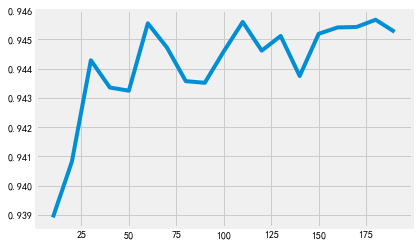

In [151]:
x_list = np.linspace(10,190,19)
print(x_list)
sns.lineplot(x_list,score_list)

# plot the top 5 important features 

0
1
2
3
4


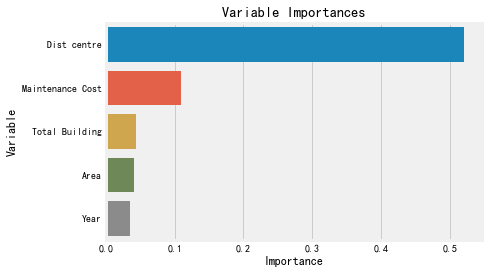

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


i= 0 
x_values  = []
y_values = []
while i < 5:
    x= feature_importances[0:5][i][0]
    print(i)
    x_values.append(x)
    
    y= feature_importances[0:5][i][1]
    y_values.append(y)
    i = i + 1
sns.barplot(y_values, x_values)
            
            
plt.xlabel('Importance'); 
plt.ylabel('Variable'); 
plt.title('Variable Importances'); 

# extract a branch for plotting

In [68]:

from sklearn.tree import export_graphviz
 
tree = model.estimators_[1]

 
export_graphviz(tree, out_file =
 
'C:/Users/melvi/Desktop/Capstone/tree2.dot', feature_names = X.columns)
 
import graphviz

with open('C:/Users/melvi/Desktop/Capstone/tree2.dot') as f:
    dot_graph = f.read()
dot=graphviz.Source(dot_graph)
dot.view()
 


# put all dataset into the model forthe best performance

In [161]:
model = RandomForestRegressor(n_estimators = 180)
model.fit(X, Y)
score=model.score(X,Y)
print(score)

0.990637647536
